<a href="https://colab.research.google.com/github/rahavi-r31/project-AnalyzingExoplanetsusingTransitFinderData/blob/main/TransitAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-6-0cb678943982>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr(method = 'pearson')


[[ 1.         -0.07369185]
 [-0.07369185  1.        ]]


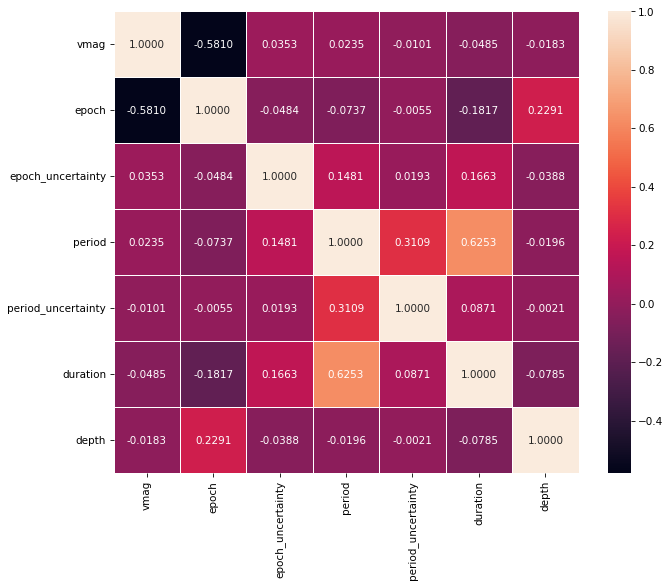

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/transit_targets.csv")
corr=df.corr(method = 'pearson')
c = np.corrcoef(df['epoch'],df['period'])
print(c)
plt.figure(figsize=(10,8), dpi =75)
sns.heatmap(corr,annot=True,fmt=".4f", linewidth=.5)
plt.show()


In [1]:
from datetime import datetime

# Get the current date and time
current_datetime = datetime.utcnow()

# Calculate the Julian Date (JD)
A = current_datetime.year // 100
B = 2 - A + current_datetime.year // 400
C = 365.25 * (current_datetime.year + 4716)
D = 30.6001 * (current_datetime.month + 1)

julian_date = B + current_datetime.day + (C + D) - 1524.5

print("Today's Julian Date:", julian_date)


Today's Julian Date: 2460255.4512


In [ ]:
# Given data
last_transit_epoch = 2458326.099  # Example last transit epoch in Julian Date (JD)
period = 17.14012  # Example orbital period in days
period_uncertainty = 0.00006  # Example uncertainty in orbital period (days)
time_since_last_transit = 2460254.4512- last_transit_epoch  # Example time since last transit in JD

# Calculate the number of orbits completed (both lower and upper limits)
lower_limit_orbits = time_since_last_transit / \
 (period + period_uncertainty)
upper_limit_orbits = time_since_last_transit / \
 (period - period_uncertainty)

# Calculate the range of possible next transit epochs
next_transit_epoch_lower = last_transit_epoch + \
 (lower_limit_orbits * period)
next_transit_epoch_upper = last_transit_epoch + \
 (upper_limit_orbits * period)

# Print the results
print(f"Lower Limit Orbits: {lower_limit_orbits}")
print(f"Upper Limit Orbits: {upper_limit_orbits}")
print(f"Range of Possible Next Transit Epochs:")
print(f"Lower Limit: {next_transit_epoch_lower}")
print(f"Upper Limit: {next_transit_epoch_upper}")


Lower Limit Orbits: 112.50478116332974
Upper Limit Orbits: 112.50556882531808
Range of Possible Next Transit Epochs:
Lower Limit: 2460254.444449713
Upper Limit: 2460254.457950334


In [2]:
import pandas as pd

# Load data from the Excel file
data = pd.read_excel("/content/toi_targets Final.xlsx")

# Get the relevant data from the Excel file
last_transit_epoch = data["epoch"].values[0]
period = data["period"].values[0]
period_uncertainty = data["period_uncertainty"].values[0]
time_since_last_transit = 2459324.678 - last_transit_epoch  # Example time since last transit in JD

# Calculate the number of orbits completed (both lower and upper limits)
lower_limit_orbits = time_since_last_transit / (period + period_uncertainty)
upper_limit_orbits = time_since_last_transit / (period - period_uncertainty)

# Calculate the range of possible next transit epochs
next_transit_epoch_lower = last_transit_epoch + (lower_limit_orbits * period)
next_transit_epoch_upper = last_transit_epoch + (upper_limit_orbits * period)

# Print the results
print(f"Lower Limit Orbits: {lower_limit_orbits}")
print(f"Upper Limit Orbits: {upper_limit_orbits}")
print(f"Range of Possible Next Transit Epochs:")
print(f"Lower Limit: {next_transit_epoch_lower}")
print(f"Upper Limit: {next_transit_epoch_upper}")


Lower Limit Orbits: 201.18842208162084
Upper Limit Orbits: 201.1886816800617
Range of Possible Next Transit Epochs:
Lower Limit: 2459324.6778143393
Upper Limit: 2459324.678185661
